# Installation / mise à jour des packages

In [1]:
!pip install gensim==4.2.0 
!pip install transformers
!pip install tensorflow
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 51.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.7 MB/s 
     |████████████████████████████████| 163 kB 44.8 MB/s 
     |████████████████████████████████| 7.6 MB 39.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 5.2 MB/s 
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 438 kB 59.2 MB/s 
     |████████████████████████████████| 5.9 MB 

In [2]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Librairies

In [3]:
# Librairies classiques
import pandas as pd
from pandas import DataFrame
import numpy as np
import sklearn
import timeit

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.cm as cm

# Natural Language
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Standardisation
from sklearn.preprocessing import StandardScaler

# ML/Clustering/PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Erreur et qualité des prédictions
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Réglagles

In [4]:
# Affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

# Format
sns.set(rc={'figure.figsize':(16,9)})
pd.options.display.max_columns = 50

# Style
sns.set_style('darkgrid')
plt.style.use('ggplot')

# Chargement du dataset

In [5]:
data = pd.read_csv("/content/drive/MyDrive/flipkart_com-ecommerce_sample_1050.csv", sep = ",")

# Preprocessing et visualisation

In [6]:
def dataset_quality(data) :     
  
# Fonction renvoyant, pour chaque colonne du df en entrée,
# son nom, le % de données présentes, le nombre de valeurs uniques,
# et le type de données.


  a = []                                                                        
  b = []                                                                          
  c = []                                                                           
  d = []                                     

  for columns in data.columns : 
    a.append(columns)
    b.append(data[columns].notna().mean() *100)
    c.append(len(data[columns].unique()))
    d.append(data[columns].dtype)

  data_quality = DataFrame(data = a, columns = ["Nom colonne"]) 
  data_quality["% remplie"] = b   
  data_quality["Nombre de valeurs uniques"] = c 
  data_quality["Type de la colonne"] = d  

  return data_quality         

In [7]:
dataset_quality(data)

,Nom colonne,% remplie,Nombre de valeurs uniques,Type de la colonne
0,uniq_id,100.000000,1050,object
1,crawl_timestamp,100.000000,149,object
2,product_url,100.000000,1050,object
3,product_name,100.000000,1050,object
4,product_category_tree,100.000000,642,object
5,pid,100.000000,1050,object
6,retail_price,99.904762,355,float64
7,discounted_price,99.904762,425,float64
8,image,100.000000,1050,object
9,is_FK_Advantage_product,100.000000,2,bool


In [8]:
def get_category(L):
    
    # Cette fonction permet de retourner la catégorie du produit (de niveau 1) 
    # dont on donne le category_tree L en entrée.

    split_tree = str.split(L[2:])
    categ = ''
    
    for i in split_tree:
        if i == '>>':
            break
        categ+='{} '.format(i)
        
    return categ        

In [9]:
def get_category2(L):
    
    # Cette fonction permet de retourner la catégorie du produit (de niveau 2)
    # dont on donne le category_tree L en entrée.
    
    c = 0
    
    split_tree = str.split(L[2:])
    categ = ''
    
    for i in split_tree:
        if i == '>>':
            c+=1
        
        if c == 2:
            break
            
        if c == 1 :     
            categ+='{} '.format(i)
    
    size = len(categ) - 1
    
    return categ[3:size]  

In [10]:
# Création de la colonne catégorie et catégorie 2.
data['product_category'] = data['product_category_tree'].apply(lambda x : get_category(x))
data['product_category2'] = data['product_category_tree'].apply(lambda x : get_category2(x))

In [11]:
l_cat = list(set(data['product_category']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data.iloc[i]['product_category'])) for i in range(len(data))]

catégories :  ['Kitchen & Dining ', 'Beauty and Personal Care ', 'Watches ', 'Computers ', 'Home Decor & Festive Needs ', 'Baby Care ', 'Home Furnishing ']


Text(0, 0.5, 'Nombre de produits')

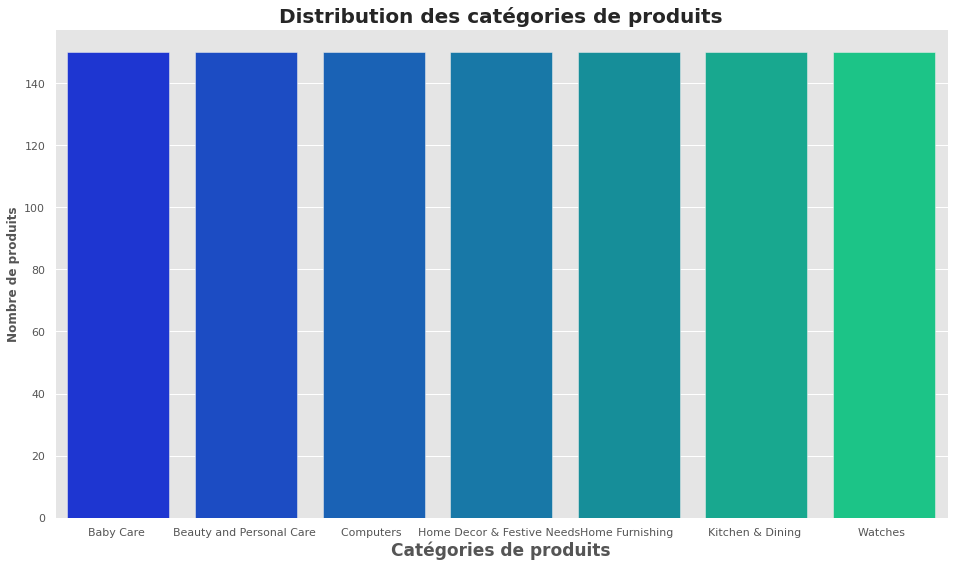

In [12]:
# Compte des catégories produits (de niveau 1) sur le dataset.
plt.title('Distribution des catégories de produits', weight='bold', size=20)
sns.barplot(x=data.groupby('product_category').size().index, 
            y=data.groupby('product_category').size(), 
            palette='winter')
plt.xlabel('Catégories de produits', weight='bold', size=17)
plt.ylabel('Nombre de produits', weight='bold', size=12)

Text(0, 0.5, 'Nombre de produits')

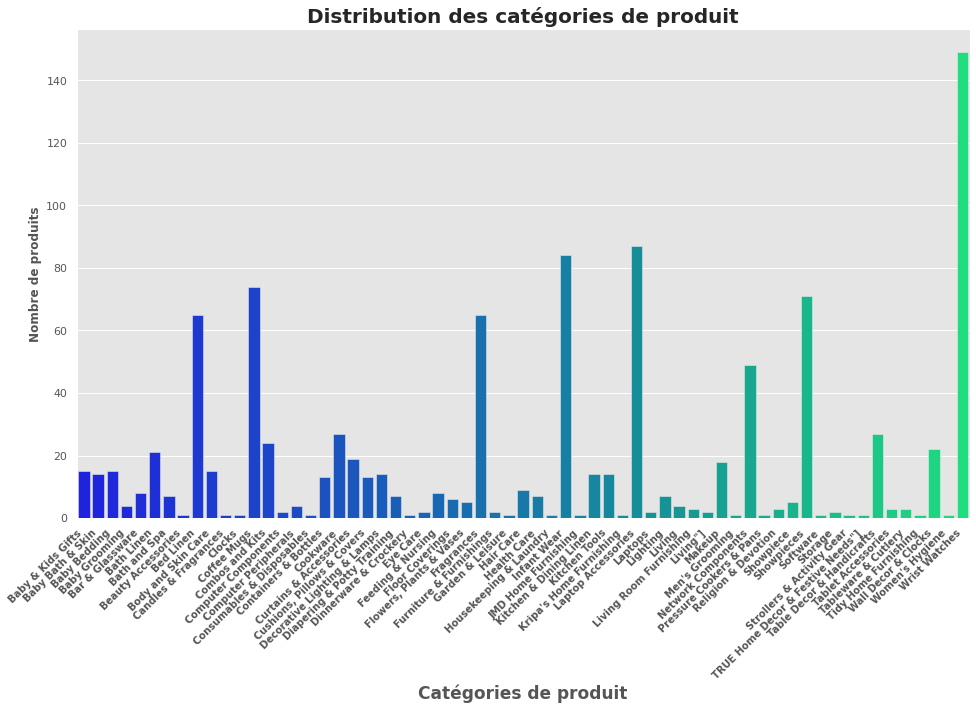

In [13]:
# Compte des catégories produits (de niveau 2) sur le dataset.
plt.title('Distribution des catégories de produit', weight='bold', size=20)
plt.xticks(rotation = 45, ha = 'right', size = 10, weight = 'bold')
sns.barplot(x=data.groupby('product_category2').size().index, 
            y=data.groupby('product_category2').size(), 
            palette='winter')
plt.xlabel('Catégories de produit', weight='bold', size=17)
plt.ylabel('Nombre de produits', weight='bold', size=12)

In [14]:
# Longueur des descriptions produits
description_length = []

for i in data['description']:
    description_length.append(len(i))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


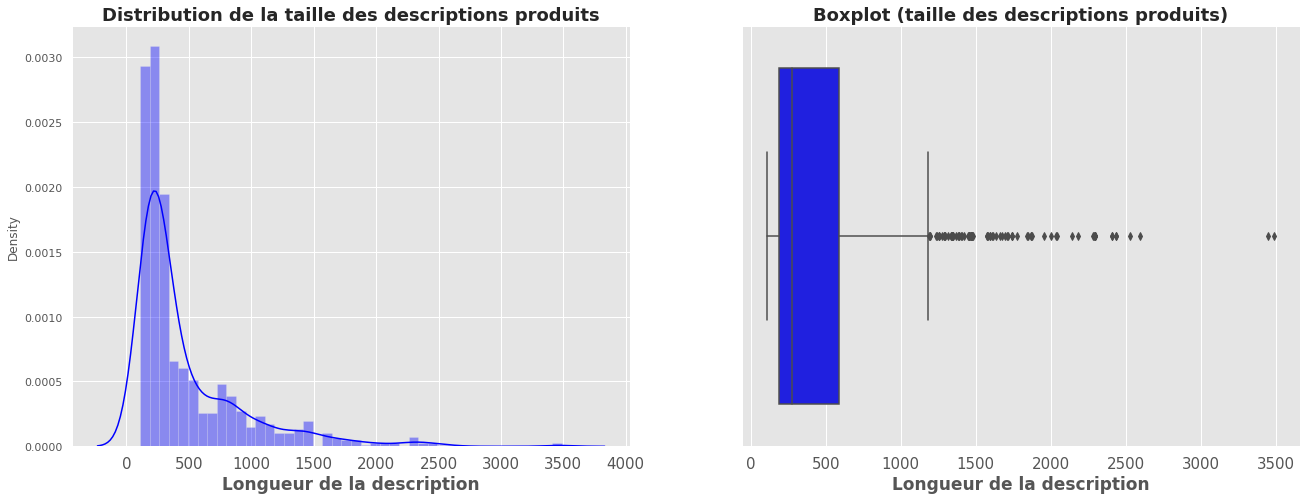

In [15]:
plt.figure(figsize = (22, 17))

plt.subplot(2, 2, 1)
plt.xticks(size = 15)
plt.xlabel('Longueur de la description', weight='bold', size=17)
plt.title('Distribution de la taille des descriptions produits',size = 18, weight = 'bold')
sns.distplot(description_length, color='blue')

plt.subplot(2, 2, 2)
plt.xticks(size = 15)
plt.xlabel('Longueur de la description', weight='bold', size=17)
plt.title('Boxplot (taille des descriptions produits)',size = 18, weight = 'bold')
sns.boxplot(description_length, color='blue')

# Fonctions de nettoyage

In [16]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

data['description_bow'] = data['description'].apply(lambda x : transform_bow_fct(x))
data['description_bow_lem'] = data['description'].apply(lambda x : transform_bow_lem_fct(x))
data['description_dl'] = data['description'].apply(lambda x : transform_dl_fct(x))

In [17]:
data_TF = data.copy()

In [18]:
data_TF.to_csv('data_produits.csv', sep = ",")

# Fonctions communes

In [19]:
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(20,8))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des catégories par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des catégories par clusters')
    
    plt.show()
    print("ARI : ", ARI)


# Nettoyage du corpus

In [20]:
# Stemming (en anglais)
stemmer = SnowballStemmer('english')
analyzer = CountVectorizer().build_analyzer()

In [21]:
def stemmed_words(doc):

    # Cette fonction permet de faire un stemming du corpus dans les paramètres du CountVectorizer
    
    return (stemmer.stem(w) for w in analyzer(doc))

In [22]:
# Liste stockant les accuracy_score
A_score = []

# Liste stockant les precision_score
P_score = []

# Dimension du bag of words testé
max_features_test = [150,200,250,300,350,400,450]

for i in max_features_test:
    
    # Tokenization et preprocessing
    stem_vectorizer = CountVectorizer(max_df=0.9,
                                      min_df=0.05,
                                      max_features=i, 
                                      stop_words='english',
                                      lowercase=True,
                                      analyzer=stemmed_words)

    description_matrix = stem_vectorizer.fit_transform(data['description'])
  
    # StandardScaler
    S = StandardScaler()
    description_matrix_standard = S.fit_transform(description_matrix.toarray())
    df_description_matrix_standard = pd.DataFrame(description_matrix_standard)
    
    data2 = pd.concat([df_description_matrix_standard, data['product_category']], axis=1)
    
    # Training/testing set
    X_train, X_test, Y_train, Y_test = train_test_split(data2.iloc[:,:data2.shape[1] - 1], 
                                                    data['product_category'], 
                                                    test_size=0.3)
    # GridSearch
    RForestClassifier = RandomForestClassifier()
    gridSearch = GridSearchCV(RForestClassifier, {'max_depth': range(3,6),
                                                  'n_estimators': (200,300,500)},
                                                  cv=5,
                                                  scoring='accuracy')
    # Fit sur le training set
    gridSearch.fit(X_train, Y_train)
    prediction = gridSearch.best_estimator_.predict(X_test)
    
    # Ajout et calcul de l'accuracy_score
    A_score.append(accuracy_score(Y_test, prediction))
    
    # Ajout et calcul du precision_score
    P_score.append(precision_score(Y_test, prediction, average='weighted'))

In [23]:
print(stem_vectorizer.vocabulary_)

{'key': 72, 'featur': 50, 'of': 90, 'multicolor': 84, 'cm': 29, 'in': 67, 'height': 62, 'pack': 97, 'price': 101, 'rs': 108, 'this': 119, 'the': 118, 'look': 75, 'is': 70, 'made': 77, 'from': 54, '100': 0, 'high': 63, 'qualiti': 104, 'fabric': 49, 'it': 71, 'an': 5, 'style': 116, 'with': 130, 'make': 78, 'and': 7, 'love': 76, 'give': 59, 'your': 134, 'home': 64, 'design': 43, 'to': 120, 'you': 133, 'beauti': 14, 'by': 23, 'print': 102, 'that': 117, 'light': 74, 'specif': 114, 'general': 55, 'brand': 21, 'for': 52, 'type': 121, 'model': 82, 'name': 85, 'set': 110, 'id': 65, 'color': 31, 'dimens': 46, 'length': 73, 'box': 19, 'number': 88, 'content': 36, 'sale': 109, 'packag': 98, 'bodi': 18, 'materi': 79, 'cotton': 37, 'blue': 17, 'yes': 132, 'ideal': 66, 'men': 80, 'women': 131, 'boy': 20, 'girl': 58, 'size': 113, '30': 1, 'inch': 68, 'width': 128, 'all': 3, 'product': 103, 'care': 25, 'wash': 124, 'water': 126, 'not': 87, 'use': 122, 'weight': 127, 'gift': 57, 'cover': 38, 'depth': 42

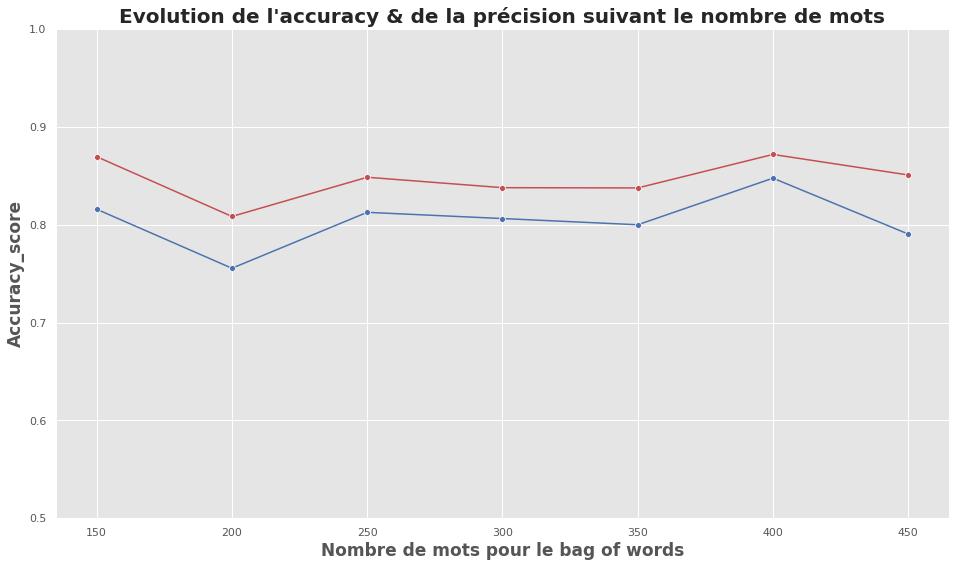

In [24]:
plt.figure(figsize=(16,9))
axes = plt.gca()

plt.title("Evolution de l'accuracy & de la précision suivant le nombre de mots", weight='bold', size=20)
plt.xlabel('Nombre de mots pour le bag of words', weight='bold', size=17)
plt.ylabel('Accuracy_score', weight='bold', size=17)

axes.set_ylim(0.5, 1)

sns.lineplot(x=max_features_test, y=A_score,  color='b', marker='o')
sns.lineplot(x=max_features_test, y=P_score,  color='r', marker='o')

# Matrice de confusion

In [ ]:
# Catégories de produit
categ_unique = data.product_category.unique()
categ_unique_accuracy = list(categ_unique)
categ_unique_accuracy.append('Accuracy %')

In [ ]:
stem_vectorizer = TfidfVectorizer(max_df=0.80,
                                  min_df=0.075,
                                  max_features=400, 
                                  stop_words='english',
                                  lowercase=True,
                                  analyzer=stemmed_words)

description_matrix = stem_vectorizer.fit_transform(data['description'])

# Standardisation
S = StandardScaler()
description_matrix_standard = S.fit_transform(description_matrix.toarray())
df_description_matrix_standard = pd.DataFrame(description_matrix_standard)

data2 = pd.concat([df_description_matrix_standard, data['product_category']], axis=1)

# Training/testing set
X_train, X_test, Y_train, Y_test = train_test_split(data2.iloc[:,:data2.shape[1] - 1], 
                                                data['product_category'], 
                                                test_size=0.3)


# GridSearch
RForestClassifier = RandomForestClassifier()
gridSearch = GridSearchCV(RForestClassifier, {'max_depth': range(3,6),
                                              'n_estimators': (200,300,500)},
                                               cv=5,
                                               scoring='accuracy')
# Fit sur le training set
gridSearch.fit(X_train, Y_train)
df_prediction = pd.DataFrame(gridSearch.best_estimator_.predict(X_test))

In [ ]:
df_real_label_ytest = pd.DataFrame(Y_test)
df_real_label_ytest.reset_index(inplace = True, drop = True)
df_compare = pd.concat([df_real_label_ytest, df_prediction], axis=1)
df_compare.columns = ['product_category', 'prediction']

In [ ]:
def dico_to_list(dico):
    
    # Cette fonction retourne les valeurs d'un dictionnaire sous forme d'une liste.
    
    L=[]
    for key, value in dico.items():
        L.append(value)
    return L

In [ ]:
# Création de la matrice de confusion

df_matrice_confusion = pd.DataFrame(columns=categ_unique_accuracy, index=categ_unique)

for i in categ_unique:
    
    dico ={j:0 for j in categ_unique}
    
    mask = (df_compare['product_category']==i)
    mask2 = (df_compare['product_category']!=df_compare['prediction'])
    
    dico[i] = df_compare[mask].shape[0] - df_compare[mask & mask2].shape[0]
    
    for k in df_compare[mask & mask2].prediction:
        dico[k]+=1
    
    # Transformation en liste du dictionnaire
    list_check_error = dico_to_list(dico)
    
    # Check de l'accuracy sur la catégorie produit en cours
    list_check_error.append(accuracy_score(df_compare[mask].product_category,
                                           df_compare[mask].prediction)*100)
    
    df_matrice_confusion.loc[i,:] = list_check_error

df_matrice_confusion = df_matrice_confusion[df_matrice_confusion.columns].astype(float)

Text(0.5, 84.5, 'Prédiction')

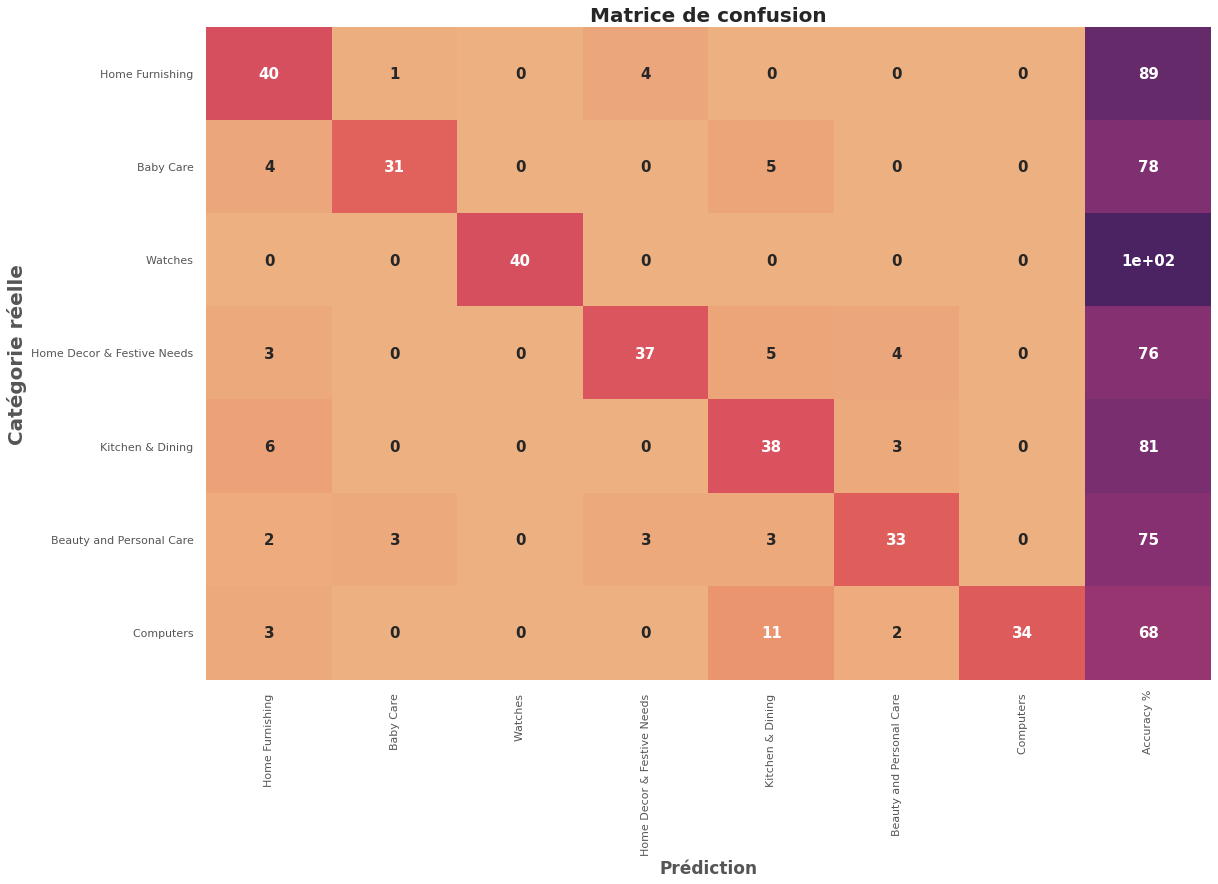

In [ ]:
plt.figure(figsize=(18,12))
plt.title('Matrice de confusion', size=20, weight='bold')
sns.heatmap(df_matrice_confusion,
            xticklabels=True, 
            yticklabels= True, 
            annot=True,
            cmap="flare", cbar=False,
            annot_kws={"size": 15, 'weight' : 'bold'})
plt.ylabel("Catégorie réelle", weight='bold', size=20)
plt.xlabel('Prédiction', weight='bold', size=17)

# Analyse en composantes principales

In [ ]:
df_description_matrix_standard.shape

(1050, 100)

In [ ]:
composantes = []
for i in range(df_description_matrix_standard.shape[1]):
    composantes.append('Principal component ' + str(i))

In [ ]:
pca = PCA(n_components=df_description_matrix_standard.shape[1])
df_pca = pd.DataFrame(pca.fit_transform(df_description_matrix_standard))
df_pca.columns = composantes

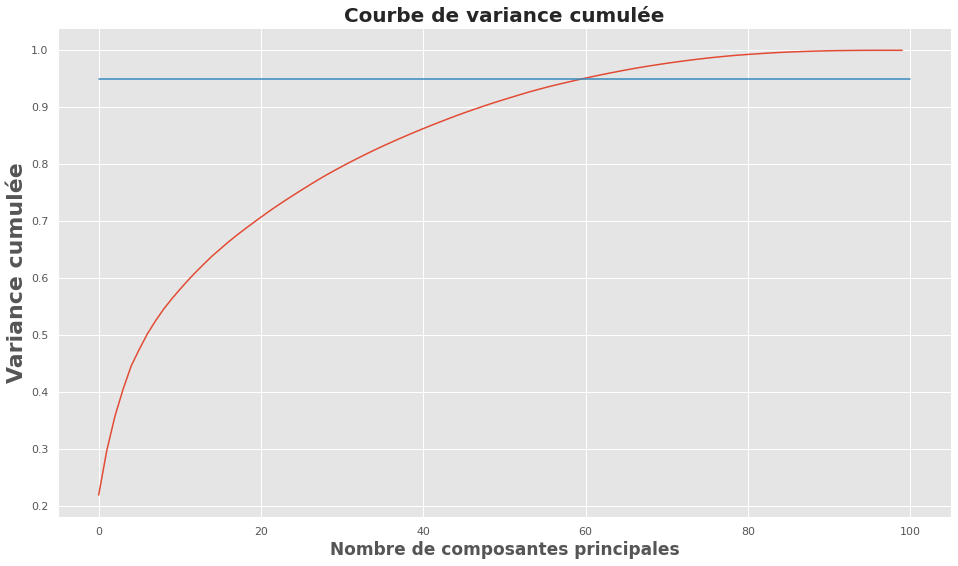

In [ ]:
plt.figure(figsize=(16,9))
plt.ylabel("Variance cumulée", weight='bold', size=22)
plt.xlabel('Nombre de composantes principales', weight='bold', size=17)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Courbe de variance cumulée', size=20, weight='bold')
plt.plot([0,df_description_matrix_standard.shape[1]],[0.95,0.95])

In [ ]:
c=0
for i in pca.explained_variance_ratio_.cumsum():
    c+=1
    if(i>0.95):
        print('Il faut {} composantes pour expliquer 95% de la variance du dataset.'.format(c))
        break

Il faut 61 composantes pour expliquer 95% de la variance du dataset.


In [ ]:
df_pca = df_pca.iloc[:,:61]

# Clustering

In [ ]:
km = KMeans(n_clusters=7, 
            init='k-means++',
            random_state=1)
km.fit(df_pca)

KMeans(n_clusters=7, random_state=1)

In [ ]:
df_pca['Labels_KM'] = km.labels_
df_pca['Categ'] = data.product_category
df_pca.groupby('Labels_KM').size()

Labels_KM
0    191
1    106
2    137
3    221
4     95
5    150
6    150
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Visualisation PCA avec KMeans')

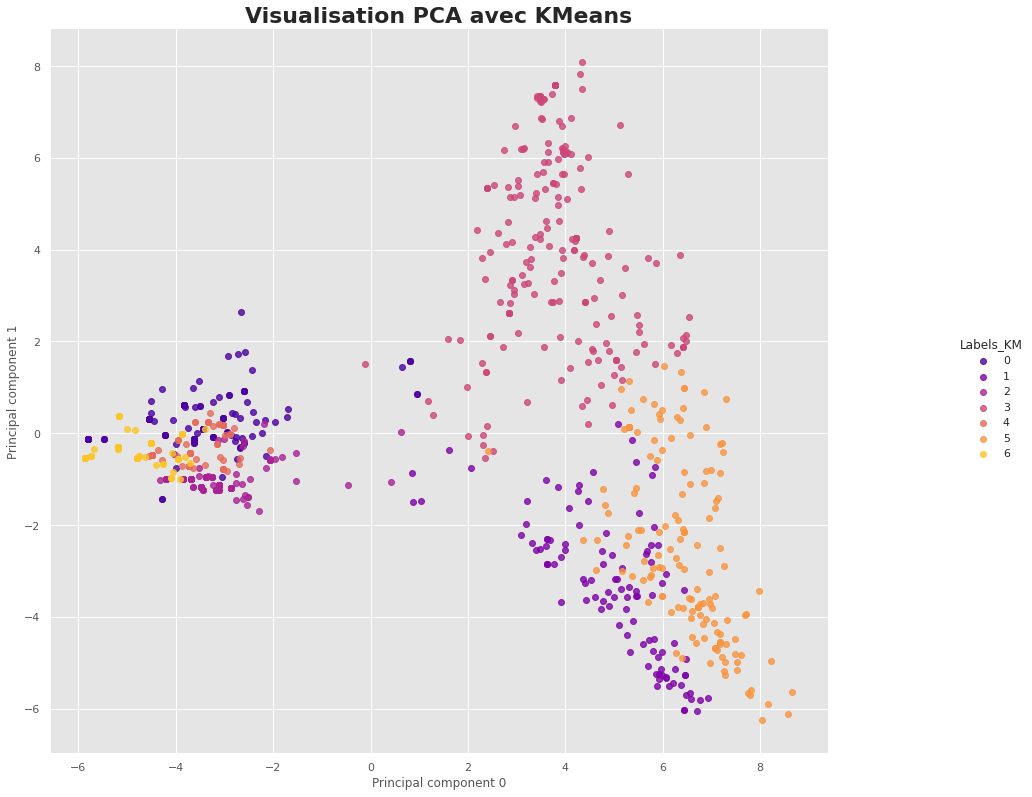

In [ ]:
sns.lmplot(x='Principal component 0', 
            y='Principal component 1', 
            hue='Labels_KM', 
            data=df_pca,
            palette = 'plasma',
            fit_reg=False,
            legend=True, 
            legend_out=True)

plt.gcf().set_size_inches(16, 12)
plt.title('Visualisation PCA avec KMeans',size=22, weight='bold')

In [ ]:
# Calcul des composantes TSNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(df_pca.iloc[:,:61])

df_pca['TSNE_2D_one'] = tsne_results[:,0]
df_pca['TSNE_2D_two'] = tsne_results[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Visualisation PCA/T-Sne avec KMeans')

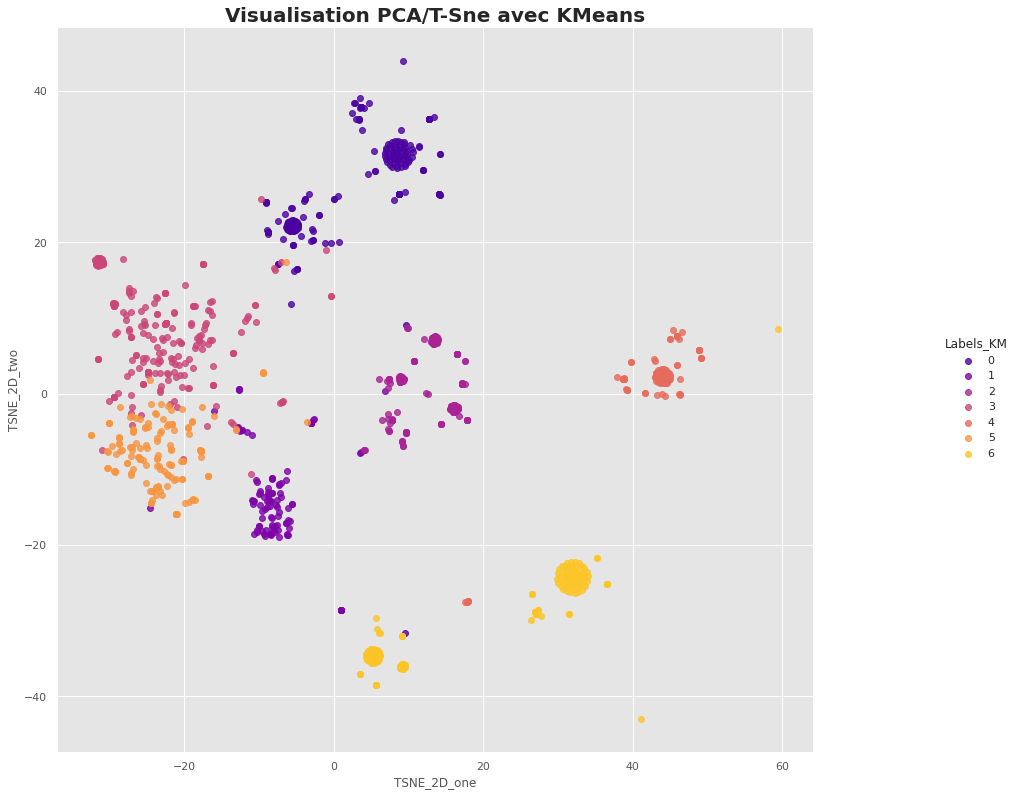

In [ ]:
sns.lmplot(x='TSNE_2D_one', 
           y='TSNE_2D_two', 
           hue='Labels_KM', 
           data=df_pca,
           palette = 'plasma',
           fit_reg=False,
           legend=True, 
           legend_out=True)

plt.gcf().set_size_inches(16, 12)
plt.title('Visualisation PCA/T-Sne avec KMeans',size=20, weight='bold')

Pour n_clusters = 7 Le score silhouette moyen est : 0.2629570627999925
 


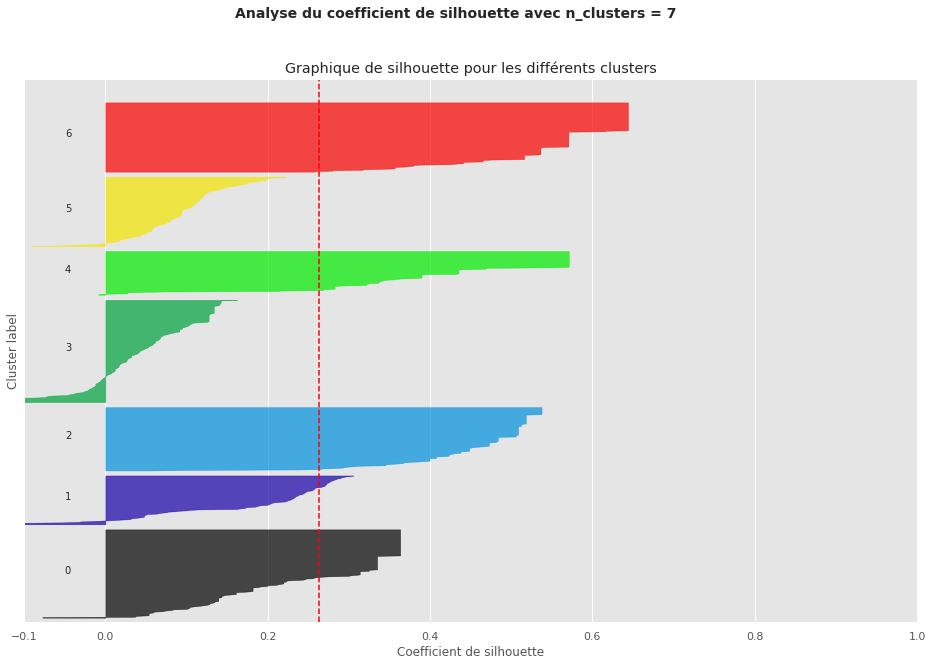

In [ ]:
# Création de plusieurs subplots
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(16, 10)

ax1.set_xlim([-0.1, 1])

ax1.set_ylim([0, len(df_pca.iloc[:,:61]) + 8 * 15])

# Nombre de clusters
n_clusters = 7 

# Labels
cluster_labels = df_pca.Labels_KM

# Calcul du coefficient de silhouette pour le nombre de clusters testés
silhouette_avg = silhouette_score(df_pca.iloc[:,:61], cluster_labels)
print("Pour n_clusters =", 7,
      "Le score silhouette moyen est :", silhouette_avg)
print(" ")

# Calcul du coefficient de silhouette pour les samples
sample_silhouette_values = silhouette_samples(df_pca.iloc[:,:61], cluster_labels)

y_lower = 10
    
for i in range(n_clusters):
    # Rassemble les scores silhouette pour les samples appartenant au
    # cluster i, et les trie
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label les graphiques silhouette avec le nombre de clusters au milieu
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcule le nouveau y_lower pour le prochain graphique
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Graphique de silhouette pour les différents clusters")
ax1.set_xlabel("Coefficient de silhouette")
ax1.set_ylabel("Cluster label")

# Ligne verticale pour montrer le coefficient de silhouette moyen
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Efface les yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(("Analyse du coefficient de silhouette "
              "avec n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

In [ ]:
fig = px.scatter(df_pca,
                 x='TSNE_2D_one',
                 y='TSNE_2D_two', 
                 color='Categ')

fig.update_layout(
    autosize=False,
    width=950,
    height=650)

fig.show()

# Qualité du clustering

In [ ]:
# ARI
adjusted_rand_score(df_pca.Labels_KM, df_pca.Categ)

0.30232009370858204

In [ ]:
# Coefficient de silhouette moyen
silhouette_score(df_pca.iloc[:,:61], df_pca.Labels_KM)

0.2629570627999925

In [ ]:
# Calcul du coefficient de silhouette de chaque cluster
silhouette_per_point = silhouette_samples(df_pca.iloc[:,:61], df_pca.Labels_KM)
df_pca['Silhouette_KM'] = silhouette_per_point

for i in range(7):
    print('Cluster {} :'.format(i),df_pca[df_pca['Labels_KM']==i]['Silhouette_KM'].mean())

Cluster 0 : 0.2521824091087086
Cluster 1 : 0.1740981668074816
Cluster 2 : 0.4587199566392618
Cluster 3 : 0.04391615501475984
Cluster 4 : 0.4100909920139213
Cluster 5 : 0.09374222059367035
Cluster 6 : 0.5594239231361456


# Word2Vec

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

## Création du modèle Word2Vec

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 500 # adapt to length of sentences
descriptions = data['description_bow_lem'].to_list()
descriptions = [gensim.utils.simple_preprocess(text) for text in descriptions]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(descriptions)
w2v_model.train(descriptions, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4712
Word2Vec trained


In [ ]:
# Préparation des descriptions (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(descriptions)
x_descriptions = pad_sequences(tokenizer.texts_to_sequences(descriptions),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4713, 300)


In [ ]:
# Création du modèle

input=Input(shape=(len(x_descriptions),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 500, 300)          1413900   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [ ]:
embeddings = embed_model.predict(x_descriptions)
embeddings.shape

33/33 [==============================] - 0s 11ms/step


(1050, 300)

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3333 time :  16.0


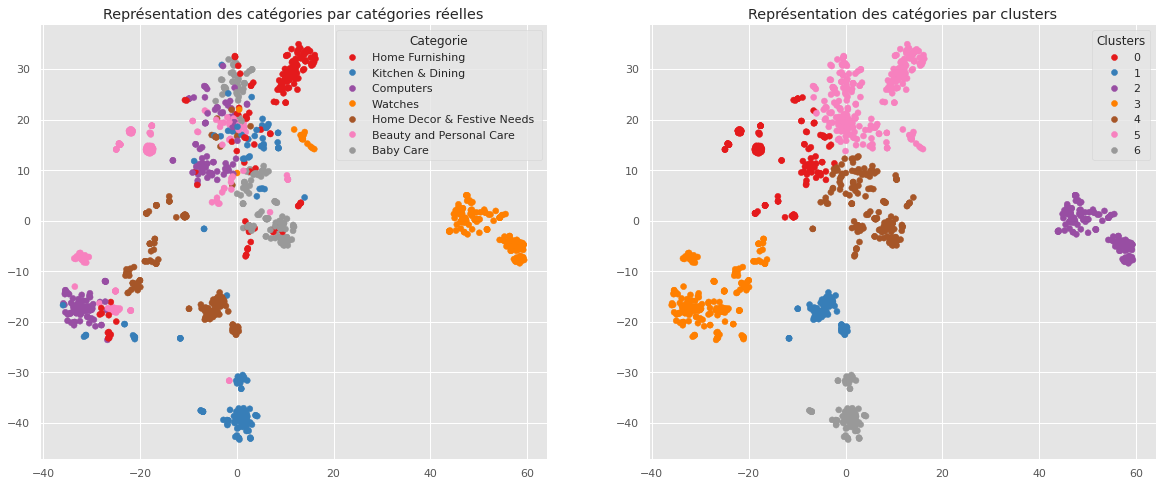

ARI :  0.3333


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# BERT

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
True


## Fonctions communes

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
descriptions = data_TF['description_dl'].to_list()

In [ ]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, descriptions, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 2s 2s/step
temps traitement :  266.0


In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3255 time :  16.0


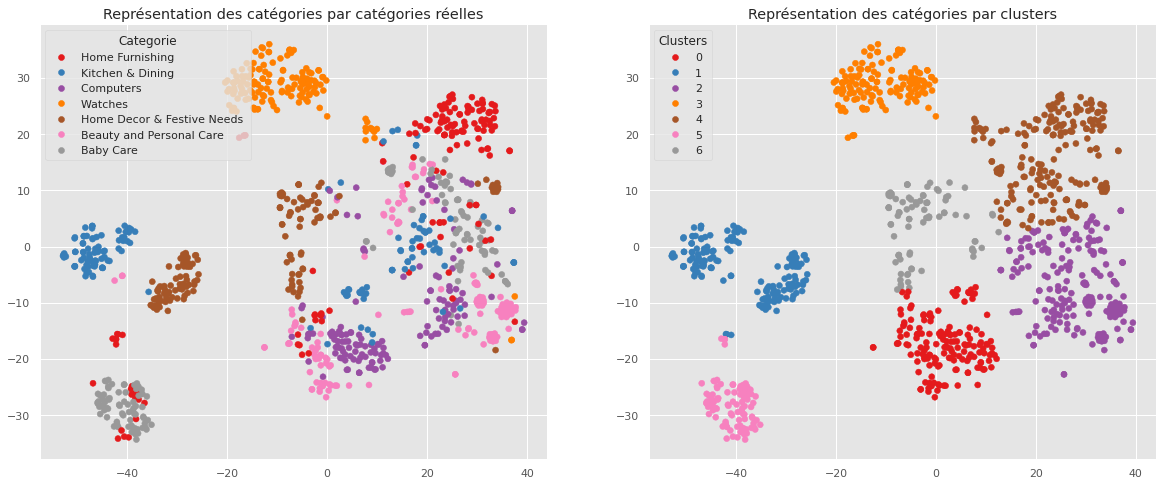

ARI :  0.3255


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## BERT Hub Tensorflow

In [ ]:
import tensorflow_hub as hub
import tensorflow_text

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [ ]:
descriptions = data_TF['description_dl'].to_list()

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, descriptions, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  244.0


In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3209 time :  16.0


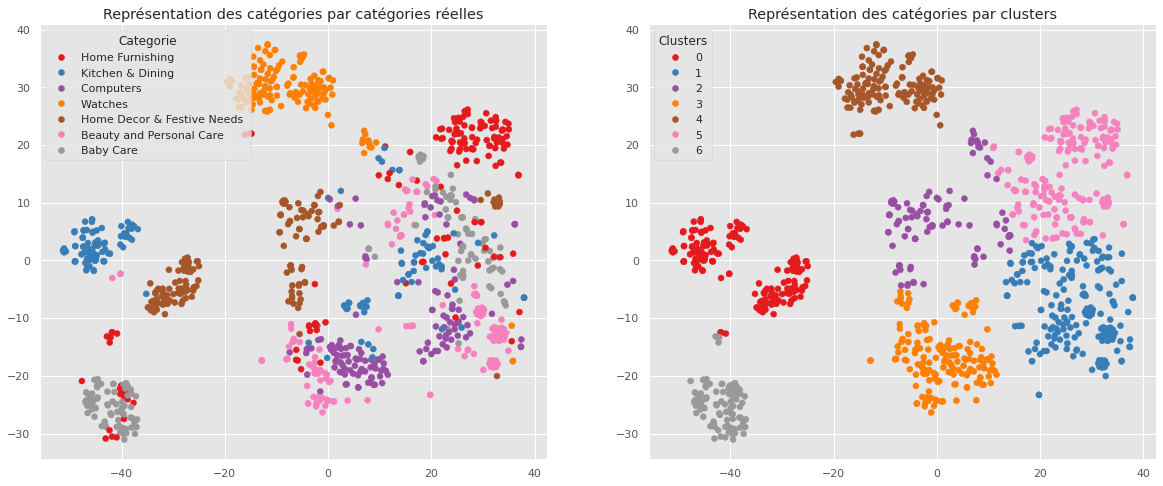

ARI :  0.3209


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# USE

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
True


In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
batch_size = 50
descriptions = data_TF['description_dl'].to_list()

In [ ]:
features_USE = feature_USE_fct(descriptions, batch_size)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.422 time :  16.0


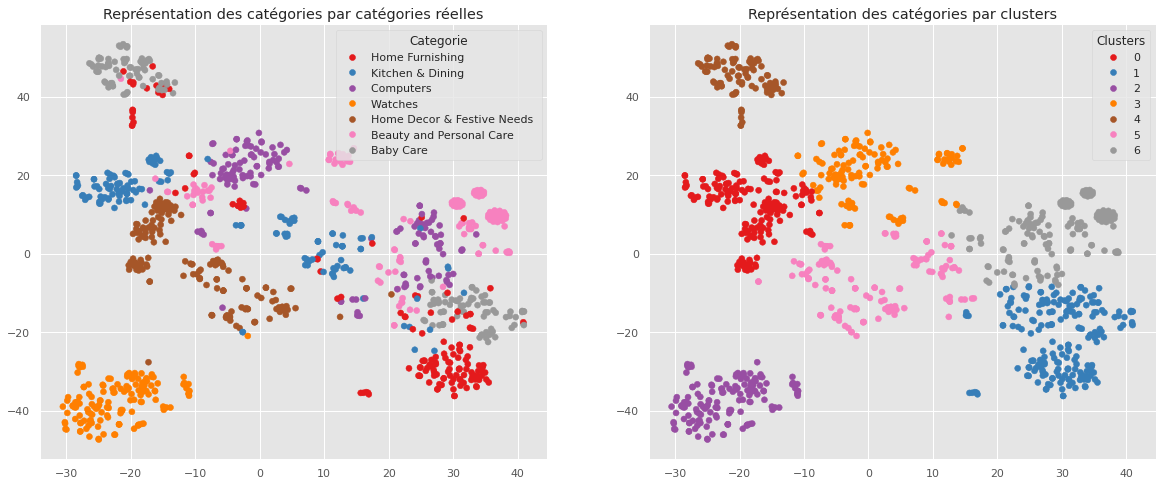

ARI :  0.422


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)